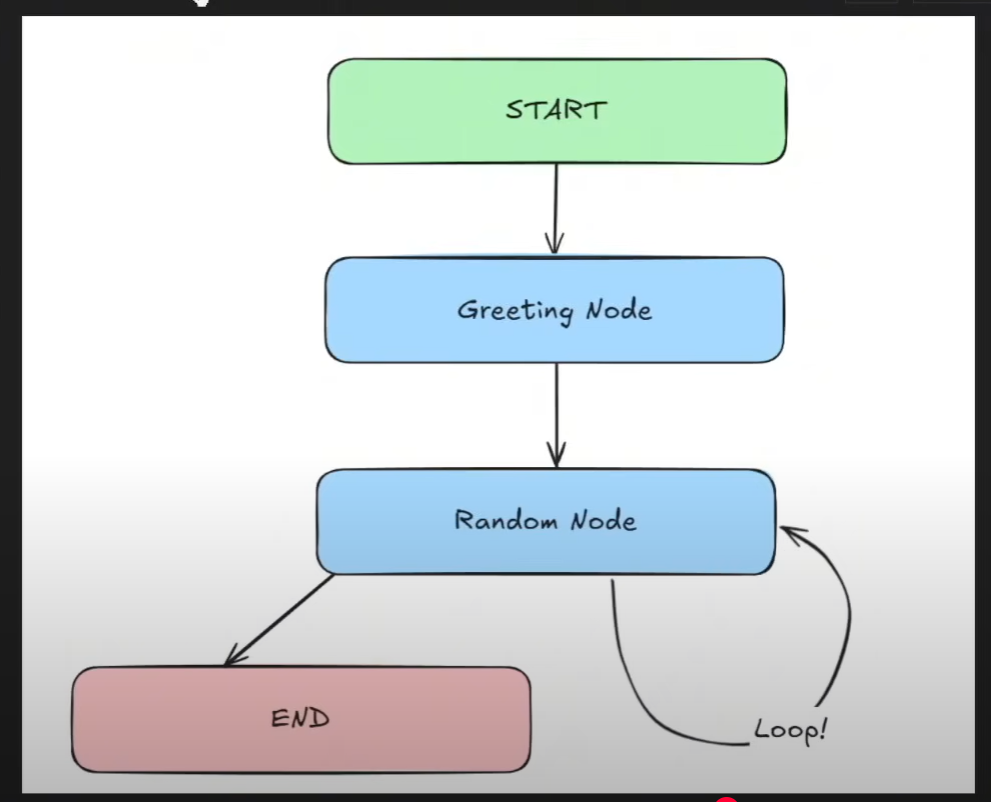

In [13]:
from typing import TypedDict, Dict, List
import random
from langgraph.graph import StateGraph, START, END

In [14]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int
    

In [15]:
def greeting_node(state: AgentState)->AgentState:
    """Greeting Node which says hi to the person"""
    state['name']= f"Hi there, {state['name']}"
   # state['counter']=0
    return state

def random_node(state: AgentState)->AgentState:
    """Generates a random number from 0 to 10"""
    state['number'].append(random.randint(0,10))
    state['counter']+=1
    return state

def should_continue(state: AgentState)->AgentState:
    """Function to decide what to the next"""

    if state["counter"] <5:
        print("ENTERING LOOP", state["counter"])
        return "loop" #continue looping
    else:
        return "exit" #exit the loop

In [16]:
#greeting -> random -> random -> random -> random-> random->END

In [17]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop": "random",
        "exit": END
    }

)

graph.set_entry_point("greeting")

app=graph.compile()

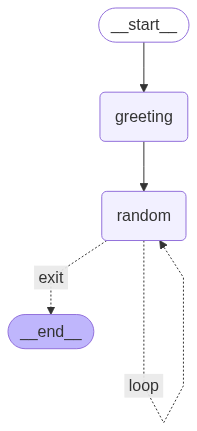

In [18]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
app.invoke({"name": "Jake", "number": [], "counter":-1})

ENTERING LOOP 0
ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Jake', 'number': [1, 7, 7, 3, 2, 7], 'counter': 5}